In [36]:
import pandas as pd
import numpy as np

import acquire
from acquire import get_telco_data
import prepare
from prepare import prep_telco ,split_function

from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [38]:
# Load the telco dataset using acquire.get_telco_data()
telco = acquire.get_telco_data()
telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,1,DSL,2,Mailed check,2,One year
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,DSL,2,Mailed check,1,Month-to-month
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,2,Fiber optic,1,Electronic check,1,Month-to-month
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,2,Fiber optic,1,Electronic check,1,Month-to-month
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,2,Fiber optic,2,Mailed check,1,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9979-RGMZT,Female,0,No,No,7,Yes,No,2,No,...,No,No,Yes,Yes,2,Fiber optic,2,Mailed check,2,One year
7039,9985-MWVIX,Female,0,No,No,1,Yes,No,2,No,...,No,No,No,No,2,Fiber optic,2,Mailed check,1,Month-to-month
7040,9986-BONCE,Female,0,No,No,4,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,None,3,Bank transfer (automatic),1,Month-to-month
7041,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,DSL,2,Mailed check,1,Month-to-month


In [8]:
telco.dtypes

customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges                object
churn                        object
customer_id                  object
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection           

In [9]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

Your function is designed to obtain the Telco data from the database internally using the acquire.get_telco_data('telco_churn') function call within the function itself. So you don't need to pass any arguments to the prep_telco() function. Just call it directly, and it will pull the data, preprocess it, and return the preprocessed DataFrame.

In [39]:

# Use the prep_telco function
telco = prep_telco()
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_tv_yes,streaming_movies_yes,device_protection_yes,contract_type_month_to_month,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,1,0,0,0,1,1,1,1,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,0,1,0,1,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,0,0,1,1,0,0,0,1,1,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,1,1,1,1,0,1,0,1,1,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,1,0,0,1,1,1,0,1,1,1


In [5]:
telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'streaming_tv', 'streaming_movies',
       'contract_type_id', 'paperless_billing', 'payment_type_id',
       'monthly_charges', 'total_charges', 'churn', 'internet_service_type',
       'payment_type', 'contract_type', 'partner_binary', 'dependents_binary',
       'phone_service_binary', 'gender_binary', 'paperless_billing_binary',
       'churn_binary', 'multiple_lines_no phone service', 'multiple_lines_yes',
       'online_security_yes', 'online_backup_yes',
       'payment_type_credit card (automatic)', 'payment_type_electronic check',
       'payment_type_mailed check', 'contract_type_one year',
       'contract_type_two year', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'device_protection_yes',
       'contract_type_month_to_month', 'gender_encoded', 'partner

In [7]:
telco.dtypes

customer_id                              object
gender                                   object
senior_citizen                            int64
partner                                  object
dependents                               object
tenure                                    int64
phone_service                            object
multiple_lines                           object
internet_service_type_id                  int64
online_security                          object
online_backup                            object
streaming_tv                             object
streaming_movies                         object
contract_type_id                          int64
paperless_billing                        object
payment_type_id                           int64
monthly_charges                         float64
total_charges                           float64
churn                                    object
internet_service_type                    object
payment_type                            

In [8]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           7043 non-null   object 
 1   gender                                7043 non-null   object 
 2   senior_citizen                        7043 non-null   int64  
 3   partner                               7043 non-null   object 
 4   dependents                            7043 non-null   object 
 5   tenure                                7043 non-null   int64  
 6   phone_service                         7043 non-null   object 
 7   multiple_lines                        7043 non-null   object 
 8   internet_service_type_id              7043 non-null   int64  
 9   online_security                       7043 non-null   object 
 10  online_backup                         7043 non-null   object 
 11  streaming_tv     

In [5]:
telco.shape

(7043, 42)

Sample questions
What month are customers most likely to churn and does that depend on their contract type?

<Figure size 1200x800 with 0 Axes>

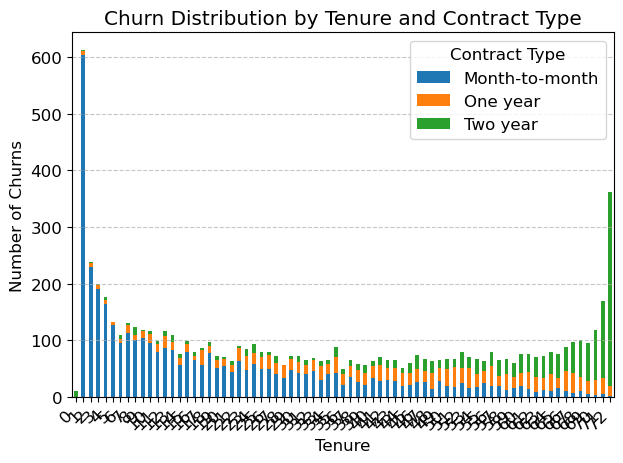

In [6]:
# Group by tenure (using 'tenure' column) and contract type
churn_by_tenure_contract = telco.groupby(['tenure', 'contract_type']).size().unstack()

# Increase the figure size and set font size
plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 12

# Plot the results with rotated X-axis labels
churn_by_tenure_contract.plot(kind='bar', stacked=True)

plt.xlabel('Tenure')
plt.ylabel('Number of Churns')
plt.title('Churn Distribution by Tenure and Contract Type')
plt.legend(title='Contract Type')

# Rotate X-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add grid lines for clarity
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
Even though the first 5 months seems to have churned quiet a lot of
customers, second month indicates the highest number of churns of customers who were on the month-to-month contract. type.


In [ ]:
Investigating
why they are motivated to do so?
Look for patterns or trends that might explain the higher churn rate 

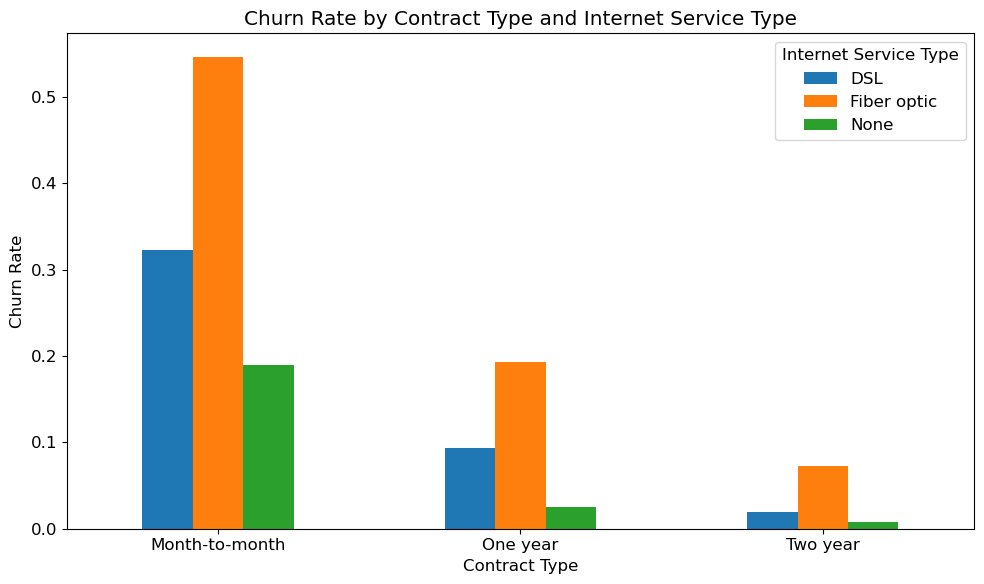

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('telco_data.csv')

# Calculate churn rate as a percentage
telco['churn_rate'] = (telco['churn'] == 'Yes').astype(int)

# Group by contract type, internet service type, and calculate mean churn rate
grouped_data = telco.groupby(['contract_type', 'internet_service_type'])['churn_rate'].mean().reset_index()

# Pivot the data for visualization
pivot_data = grouped_data.pivot(index='contract_type', columns='internet_service_type', values='churn_rate')

# Create grouped bar charts
pivot_data.plot(kind='bar', figsize=(10, 6))

plt.title('Churn Rate by Contract Type and Internet Service Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)

plt.legend(title='Internet Service Type')
plt.tight_layout()
plt.show()


The customer churn rate is influenced by Contract Type and Internet Service Type. There could be several reasons like Service Quality,Technology Reliability etc which influenced the higher customer churn rate for fiber optic internet service compared to DSL, for month-to-month, 1-year contract or 2-year contract customers.Analyze features such as monthly charges, contract type, and any additional services (e.g., online security, tech support) that might be influencing churn rates differently for Fiber optic users. Increased churn could be due to other factors like complaints related to internet service quality, speed, reliability, and customer support for Fiber optic.Investigating further on the reasons behind is beyond the scope of this project.

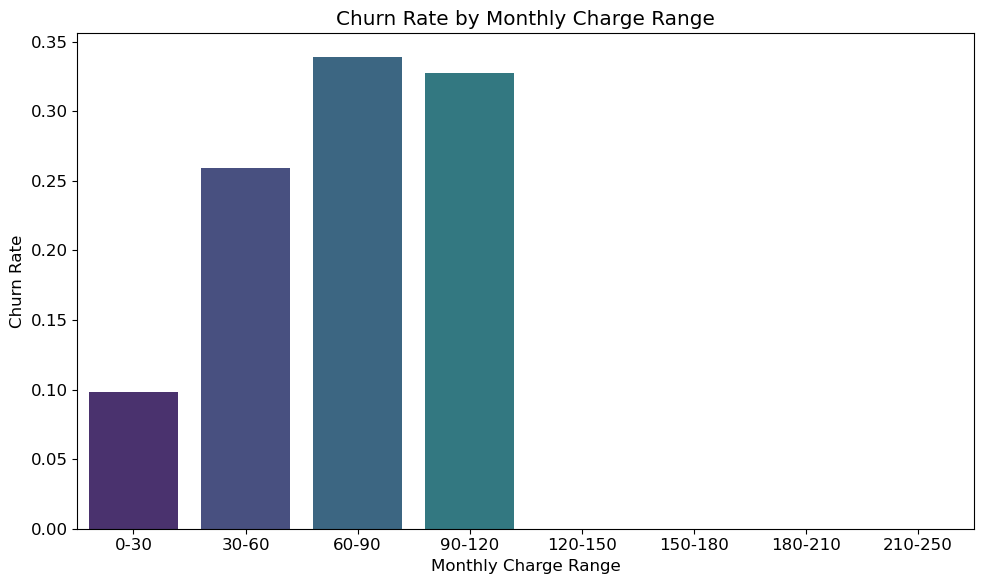

In [8]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# telco = pd.read_csv('telco_data.csv')

# Calculate churn rate as a percentage
telco['churn_rate'] = (telco['churn'] == 'Yes').astype(int)

# Define bins for monthly charges
bins = [0, 30, 60, 90, 120, 150, 180, 210, 250]
labels = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-250']

# Create a new column with monthly charge ranges
telco['monthly_charge_range'] = pd.cut(telco['monthly_charges'], bins=bins, labels=labels)

# Calculate churn rates within each charge range
churn_by_charge_range = telco.groupby('monthly_charge_range')['churn_rate'].mean().reset_index()

# Set up the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_charge_range, x='monthly_charge_range', y='churn_rate', palette='viridis')

plt.title('Churn Rate by Monthly Charge Range')
plt.xlabel('Monthly Charge Range')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


In [ ]:
The customers who had to pay more than 60$ a month are more likely to churn.
Figure out the percentage of churn rate for above 60 monthly charge

In [13]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   customer_id                           7043 non-null   object  
 1   gender                                7043 non-null   object  
 2   senior_citizen                        7043 non-null   int64   
 3   partner                               7043 non-null   object  
 4   dependents                            7043 non-null   object  
 5   tenure                                7043 non-null   int64   
 6   phone_service                         7043 non-null   object  
 7   multiple_lines                        7043 non-null   object  
 8   internet_service_type_id              7043 non-null   int64   
 9   online_security                       7043 non-null   object  
 10  online_backup                         7043 non-null   object  
 11  stre

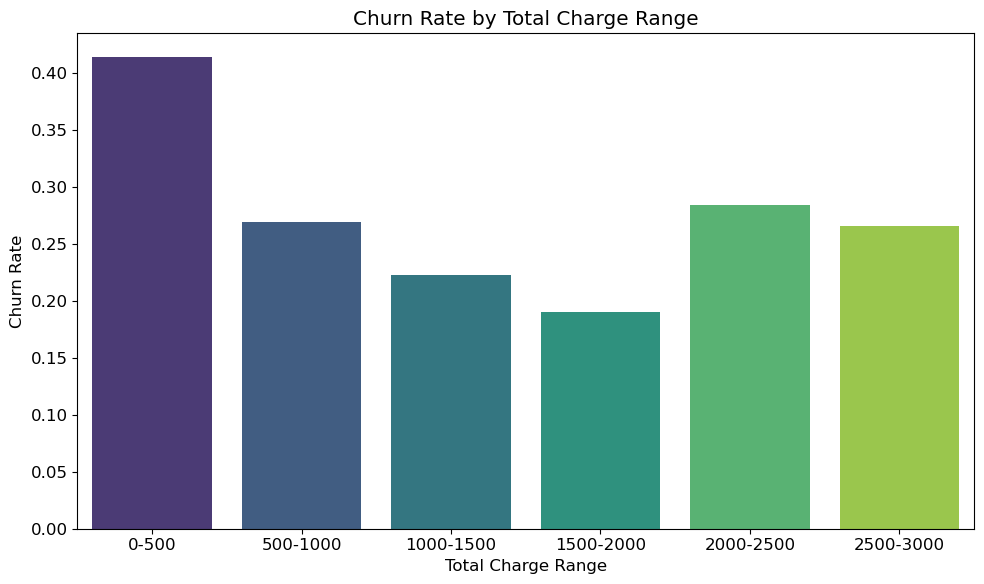

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#telco = pd.read_csv('telco_data.csv')

# Convert 'total_charges' column to numeric
telco['total_charges'] = pd.to_numeric(telco['total_charges'], errors='coerce')

# Calculate churn rate as a percentage
telco['churn_rate'] = (telco['churn'] == 'Yes').astype(int)

# Define bins for total charges
bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000']

# Create a new column with total charge ranges
telco['total_charge_range'] = pd.cut(telco['total_charges'], bins=bins, labels=labels)

# Calculate churn rates within each charge range
churn_by_total_charge_range = telco.groupby('total_charge_range')['churn_rate'].mean().reset_index()

# Set up the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_total_charge_range, x='total_charge_range', y='churn_rate', palette='viridis')

plt.title('Churn Rate by Total Charge Range')
plt.xlabel('Total Charge Range')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


The customer churn rate is not influenced by the increase in total charges. It could be due to various factors like Perceived Value,Loyalty Programs etc. Beyond the scope of this project so didn't analyse any further.

In [15]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   customer_id                           7043 non-null   object  
 1   gender                                7043 non-null   object  
 2   senior_citizen                        7043 non-null   int64   
 3   partner                               7043 non-null   object  
 4   dependents                            7043 non-null   object  
 5   tenure                                7043 non-null   int64   
 6   phone_service                         7043 non-null   object  
 7   multiple_lines                        7043 non-null   object  
 8   internet_service_type_id              7043 non-null   int64   
 9   online_security                       7043 non-null   object  
 10  online_backup                         7043 non-null   object  
 11  stre

In [10]:
# Drop the original 'monthly_charge_range' and 'total_charge_range' columns
telco.drop(['monthly_charge_range', 'total_charge_range','churn_rate'], axis=1, inplace=True)


In [ ]:
Lets do 
Hypothesis Test:
Null Hypothesis (H0): The churn status and contract type are independent (i.e., no relationship).
Alternative Hypothesis (H1): The churn status and contract type are dependent (i.e., there's a relationship). 
                                                                                                                                                                  

- Prepare your data by creating a contingency table that shows the counts of churn and no-churn cases for each combination of contract type and churn month    

In [29]:
# Create the contingency table using 'churn' column
contingency_table = pd.crosstab(index=telco['churn'], columns=telco['contract_type'], margins=True)

# Print the contingency table
print(contingency_table)


contract_type  Month-to-month  One year  Two year   All
churn                                                  
No                       2220      1307      1647  5174
Yes                      1655       166        48  1869
All                      3875      1473      1695  7043


 - use a chi-squared test for independence
- This test will compute a chi-squared statistic and a p-value.

In [20]:
telco.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           7043 non-null   object 
 1   gender                                7043 non-null   object 
 2   senior_citizen                        7043 non-null   int64  
 3   partner                               7043 non-null   object 
 4   dependents                            7043 non-null   object 
 5   tenure                                7043 non-null   int64  
 6   phone_service                         7043 non-null   object 
 7   multiple_lines                        7043 non-null   object 
 8   internet_service_type_id              7043 non-null   int64  
 9   online_security                       7043 non-null   object 
 10  online_backup                         7043 non-null   object 
 11  streaming_tv     

In [30]:

alpha = 0.05

# Create the contingency table using 'churn' and 'contract_type' columns
contingency_table = pd.crosstab(index=telco['churn'], columns=telco['contract_type'], margins=True)

# Perform chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

if p_val <= alpha:
    print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
    print(f"P-Value: {p_val:.4f}")
    print("Result: Reject the null hypothesis. There is a significant relationship between the variables.")
else:
    print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
    print(f"P-Value: {p_val:.4f}")
    print("Result: Fail to reject the null hypothesis. There is no significant relationship between the variables.")



Chi-Squared Statistic: 1184.5966
P-Value: 0.0000
Result: Reject the null hypothesis. There is a significant relationship between the variables.


In [ ]:
Exploration Summary

In [ ]:
Our hypothesis proves that the churn status and contract type are dependent

<style>
Implementing Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN) classification algorithms using Python's scikit-learn library:  


.output_stderr {
    color: cyan;
}
</style>


<div style="background-color: lightblue; padding: 40px; font-size: 18px;">
            Implementing Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN) classification algorithms using Python's scikit-learn library
</div>

In [19]:
telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'streaming_tv', 'streaming_movies',
       'contract_type_id', 'paperless_billing', 'payment_type_id',
       'monthly_charges', 'total_charges', 'churn', 'internet_service_type',
       'payment_type', 'contract_type', 'partner_binary', 'dependents_binary',
       'phone_service_binary', 'gender_binary', 'paperless_billing_binary',
       'churn_binary', 'multiple_lines_no phone service', 'multiple_lines_yes',
       'online_security_yes', 'online_backup_yes',
       'payment_type_credit card (automatic)', 'payment_type_electronic check',
       'payment_type_mailed check', 'contract_type_one year',
       'contract_type_two year', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'device_protection_yes',
       'contract_type_month_to_month', 'gender_encoded', 'partner

In [13]:
telco.T




,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9964-WBQDJ,9965-YOKZB,9972-NKTFD,9975-GPKZU,9975-SKRNR,9979-RGMZT,9985-MWVIX,9986-BONCE,9992-UJOEL,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Female,Male,Female,Male,Male,Female,Female,Female,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,Yes,No,No,Yes,No,No,No,No,No,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,No,No,Yes,No,No,No,No,No,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,71,9,28,46,1,7,1,4,2,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,Yes,Yes,No,No,No,No,No,No,No,No phone service
internet_service_type_id,1,1,2,2,2,1,2,2,1,1,...,3,2,1,3,3,2,2,3,1,1
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No internet service,No internet service,No,No,No internet service,No,Yes


In [40]:
# lets split our data into 3 - train,validate,test
train, validate, test = split_function(telco, 'churn')

In [41]:

# For training set
columns_to_drop =['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
        'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'streaming_tv', 'streaming_movies',
       'contract_type_id', 'paperless_billing', 'payment_type_id', 'churn', 
       'payment_type', 'contract_type', 'partner_binary', 'dependents_binary',
       'phone_service_binary', 'gender_binary', 'paperless_billing_binary',
       'churn_binary', 'multiple_lines_no phone service', 'multiple_lines_yes',
       'online_security_yes', 'online_backup_yes','internet_service_type',
       'payment_type_credit card (automatic)', 'payment_type_electronic check',
       'payment_type_mailed check', 'contract_type_one year',
       'contract_type_two year', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'device_protection_yes',
       'contract_type_month_to_month', 'gender_encoded', 'partner_encoded',
       'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded']
X_train = train.drop(columns=columns_to_drop)
y_train = train['churn_encoded']

# For validation set
X_val = validate.drop(columns=columns_to_drop)
y_val = validate['churn_encoded']

# For testing set
X_test = test.drop(columns=columns_to_drop)
y_test = test['churn_encoded']



In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")


Model: Logistic Regression
Accuracy: 0.7871
Precision: 0.6480
Recall: 0.4332
F1-Score: 0.5192
ROC-AUC: 0.6741
confusion_matrix:
---------------
[[947  88]
 [212 162]]
Model: Random Forest
Accuracy: 0.7644
Precision: 0.5691
Recall: 0.4626
F1-Score: 0.5103
ROC-AUC: 0.6680
confusion_matrix:
---------------
[[904 131]
 [201 173]]
Model: K-Nearest Neighbors
Accuracy: 0.7665
Precision: 0.5748
Recall: 0.4626
F1-Score: 0.5126
ROC-AUC: 0.6694
confusion_matrix:
---------------
[[907 128]
 [201 173]]
